In [9]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [10]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [11]:
# exploring categoric data
grouped = dataset.groupby(['Aparencia']).size()
grouped

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

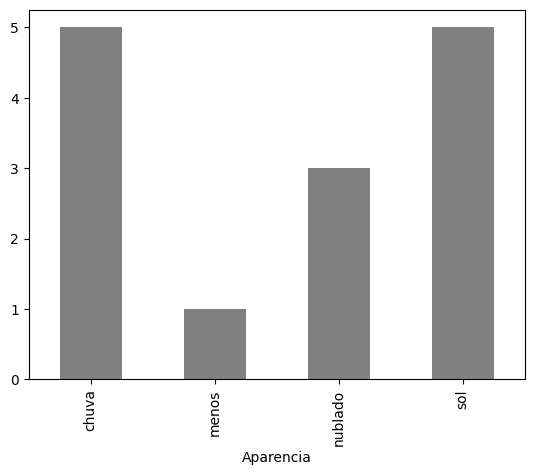

In [12]:
grouped.plot.bar(color='gray')

In [13]:
# wind
grouped = dataset.groupby(['Vento']).size()
grouped

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [14]:
# play
grouped = dataset.groupby(['Jogar']).size()
grouped

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

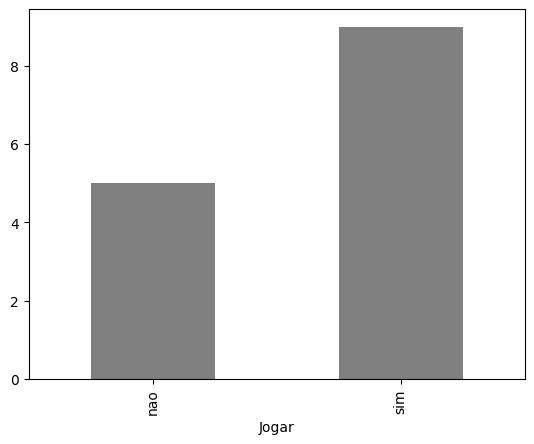

In [15]:
grouped.plot.bar(color="gray")